<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.514129,66.367533,94.886904,88.352846,5.764661,363.886073,346.024547,17.861525
1,0.0,1.0,23.786356,28.224520,21.605699,74.697312,-28.941502,129.372384,160.651633,-31.279248
2,0.0,2.0,52.806276,72.122741,53.569160,91.034290,-2.812857,276.719610,275.305691,1.413919
3,0.0,3.0,97.152106,60.983510,73.739891,28.693729,1.882206,272.451441,264.863139,7.588302
4,0.0,4.0,43.536078,56.406801,33.547409,26.216558,-18.048672,151.658174,173.089776,-21.431602
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.745117,62.367995,47.378955,84.320960,58.868945,342.681972,288.285979,54.395993
119996,999.0,116.0,67.539293,87.871178,35.981561,60.604255,11.414728,273.411015,262.177939,11.233077
119997,999.0,117.0,44.674445,26.821098,56.431300,76.410489,3.607219,217.944551,222.183924,-4.239373
119998,999.0,118.0,80.278147,53.694983,28.792919,32.764068,16.130523,221.660640,207.841340,13.819300


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    98.514129  66.367533  94.886904  88.352846   5.764661   
      1.0    23.786356  28.224520  21.605699  74.697312 -28.941502   
      2.0    52.806276  72.122741  53.569160  91.034290  -2.812857   
      3.0    97.152106  60.983510  73.739891  28.693729   1.882206   
      4.0    43.536078  56.406801  33.547409  26.216558 -18.048672   
...                ...        ...        ...        ...        ...   
999.0 115.0  79.745117  62.367995  47.378955  84.320960  58.868945   
      116.0  67.539293  87.871178  35.981561  60.604255  11.414728   
      117.0  44.674445  26.821098  56.431300  76.410489   3.607219   
      118.0  80.278147  53.694983  28.792919  32.764068  16.130523   
      119.0  70.135768  54.367287  37.127030  56.016736 -16.136661   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    363.886073  346.024547  17.861525  
      1.0    129.372384  160.651633 -31.279248  
      2.0    276.719610  275.305691   1.413919  
      3.0    272.451441  264.863139   7.588302  
      4.0    151.658174  173.089776 -21.431602  
...                 ...         ...        ...  
999.0 115.0  342.681972  288.285979  54.395993  
      116.0  273.411015  262.177939  11.233077  
      117.0  217.944551  222.183924  -4.239373  
      118.0  221.660640  207.841340  13.819300  
      119.0  211.510160  231.087055 -19.576895  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    98.514129  66.367533  94.886904  88.352846   5.764661   
      1.0    23.786356  28.224520  21.605699  74.697312 -28.941502   
      2.0    52.806276  72.122741  53.569160  91.034290  -2.812857   
      3.0    97.152106  60.983510  73.739891  28.693729   1.882206   
      4.0    43.536078  56.406801  33.547409  26.216558 -18.048672   
...                ...        ...        ...        ...        ...   
999.0 115.0  79.745117  62.367995  47.378955  84.320960  58.868945   
      116.0  67.539293  87.871178  35.981561  60.604255  11.414728   
      117.0  44.674445  26.821098  56.431300  76.410489   3.607219   
      118.0  80.278147  53.694983  28.792919  32.764068  16.130523   
      119.0  70.135768  54.367287  37.127030  56.016736 -16.136661   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    363.886073  346.024547  17.861525  
      1.0    129.372384  160.651633 -31.279248  
      2.0    276.719610  275.305691   1.413919  
      3.0    272.451441  264.863139   7.588302  
      4.0    151.658174  173.089776 -21.431602  
...                 ...         ...        ...  
999.0 115.0  342.681972  288.285979  54.395993  
      116.0  273.411015  262.177939  11.233077  
      117.0  217.944551  222.183924  -4.239373  
      118.0  221.660640  207.841340  13.819300  
      119.0  211.510160  231.087055 -19.576895  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.514129,66.367533,94.886904,88.352846,5.764661,363.886073,346.024547,17.861525
1,0.0,1.0,23.786356,28.224520,21.605699,74.697312,-28.941502,129.372384,160.651633,-31.279248
2,0.0,2.0,52.806276,72.122741,53.569160,91.034290,-2.812857,276.719610,275.305691,1.413919
3,0.0,3.0,97.152106,60.983510,73.739891,28.693729,1.882206,272.451441,264.863139,7.588302
4,0.0,4.0,43.536078,56.406801,33.547409,26.216558,-18.048672,151.658174,173.089776,-21.431602
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.745117,62.367995,47.378955,84.320960,58.868945,342.681972,288.285979,54.395993
119996,999.0,116.0,67.539293,87.871178,35.981561,60.604255,11.414728,273.411015,262.177939,11.233077
119997,999.0,117.0,44.674445,26.821098,56.431300,76.410489,3.607219,217.944551,222.183924,-4.239373
119998,999.0,118.0,80.278147,53.694983,28.792919,32.764068,16.130523,221.660640,207.841340,13.819300


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    98.514129  66.367533  94.886904  88.352846   5.764661   
      1.0    23.786356  28.224520  21.605699  74.697312 -28.941502   
      2.0    52.806276  72.122741  53.569160  91.034290  -2.812857   
      3.0    97.152106  60.983510  73.739891  28.693729   1.882206   
      4.0    43.536078  56.406801  33.547409  26.216558 -18.048672   
...                ...        ...        ...        ...        ...   
999.0 115.0  79.745117  62.367995  47.378955  84.320960  58.868945   
      116.0  67.539293  87.871178  35.981561  60.604255  11.414728   
      117.0  44.674445  26.821098  56.431300  76.410489   3.607219   
      118.0  80.278147  53.694983  28.792919  32.764068  16.130523   
      119.0  70.135768  54.367287  37.127030  56.016736 -16.136661   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    363.886073  346.024547  17.861525  
      1.0    129.372384  160.651633 -31.279248  
      2.0    276.719610  275.305691   1.413919  
      3.0    272.451441  264.863139   7.588302  
      4.0    151.658174  173.089776 -21.431602  
...                 ...         ...        ...  
999.0 115.0  342.681972  288.285979  54.395993  
      116.0  273.411015  262.177939  11.233077  
      117.0  217.944551  222.183924  -4.239373  
      118.0  221.660640  207.841340  13.819300  
      119.0  211.510160  231.087055 -19.576895  

[120000 rows x 8 columns]

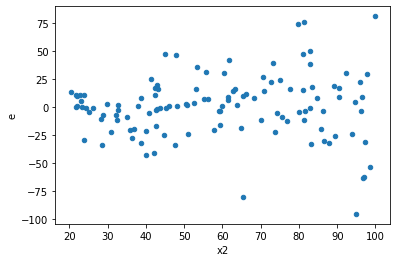

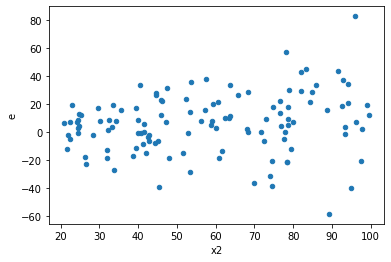

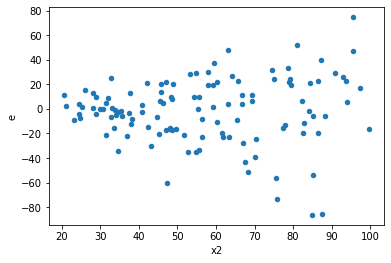

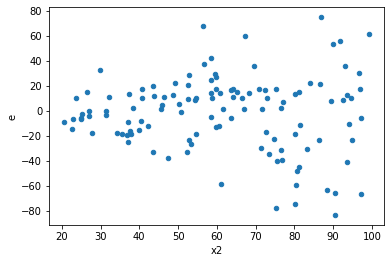

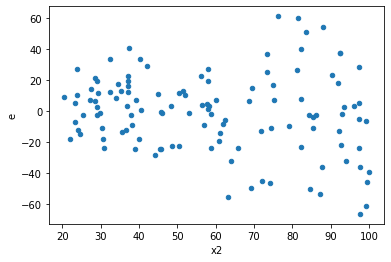

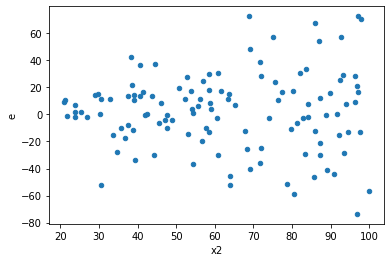

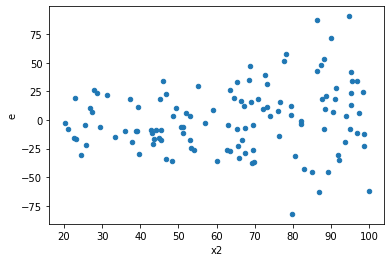

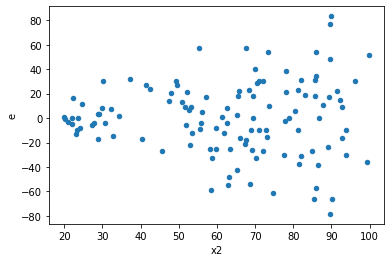

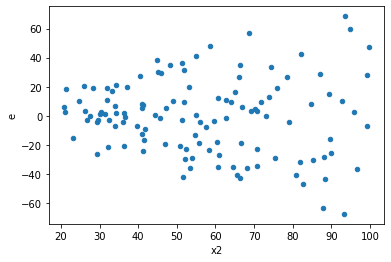

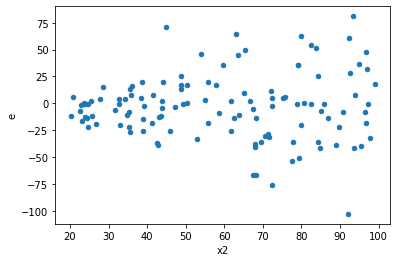

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,41.0,71.0,23000.736123215604,62442.047487553355,560.9935639808684,879.465457571174,1.5676925976305256,0.09602365881675312,0.9519881705916234,0.04801182940837656,Reject005=1 : Homoscedasticity
1.0,69.0,43.0,41951.58550192388,30675.645284162736,607.9939927815055,713.3870996316915,1.1733456384462355,0.5795882876187908,0.7102058561906046,0.2897941438093954,Reject005=1 : Homoscedasticity
3.0,61.0,51.0,30956.477548233746,42913.934342866334,507.4832384956352,841.4496929973791,1.6580837142360443,0.06509792805960268,0.9674510359701987,0.03254896402980134,Reject005=1 : Homoscedasticity
4.0,52.0,60.0,25820.60535644945,45425.327280518904,496.5501030086433,757.0887880086484,1.524697675866699,0.11510805048238448,0.9424459747588078,0.05755402524119224,Reject005=1 : Homoscedasticity
5.0,62.0,50.0,26233.234307235427,37381.15993801708,423.11668237476493,747.6231987603417,1.7669433276992688,0.0390027761756806,0.9804986119121597,0.0195013880878403,Reject005=0 : Heteroscedasticity
6.0,60.0,52.0,32705.27300803568,66742.01905052284,545.0878834672613,1283.5003663562084,2.354666844164583,0.001942448418250864,0.9990287757908746,0.000971224209125432,Reject005=0 : Heteroscedasticity
7.0,62.0,50.0,29763.462191899547,41598.28990394301,480.0558418048314,831.9657980788602,1.7330604601143447,0.0460280259659549,0.9769859870170226,0.02301401298297745,Reject005=0 : Heteroscedasticity
13.0,46.0,66.0,35718.54552313309,57577.484727037176,776.4901200681107,872.386132227836,1.1234993333222496,0.6567936130596181,0.6716031934701909,0.32839680652980907,Reject005=1 : Homoscedasticity
14.0,52.0,60.0,19305.4608637185,49569.39861023541,371.2588627638173,826.1566435039235,2.225284636583874,0.003001546314020498,0.9984992268429898,0.001500773157010249,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,41.0,71.0,23000.736123215604,62442.047487553355,560.9935639808684,879.465457571174,1.5676925976305256,0.09602365881675312,Reject005=1 : Homoscedasticity
1.0,69.0,43.0,41951.58550192388,30675.645284162736,607.9939927815055,713.3870996316915,1.1733456384462355,0.5795882876187908,Reject005=1 : Homoscedasticity
2.0,49.0,63.0,55146.18989355291,34706.45416008957,1125.4324468072023,550.8960977791995,0.4894972588910736,0.010320988308131645,Reject005=0 : Heteroscedasticity
3.0,61.0,51.0,30956.477548233746,42913.934342866334,507.4832384956352,841.4496929973791,1.6580837142360443,0.06509792805960268,Reject005=1 : Homoscedasticity
4.0,52.0,60.0,25820.60535644945,45425.327280518904,496.5501030086433,757.0887880086484,1.524697675866699,0.11510805048238448,Reject005=1 : Homoscedasticity
5.0,62.0,50.0,26233.234307235427,37381.15993801708,423.11668237476493,747.6231987603417,1.7669433276992688,0.0390027761756806,Reject005=0 : Heteroscedasticity
6.0,60.0,52.0,32705.27300803568,66742.01905052284,545.0878834672613,1283.5003663562084,2.354666844164583,0.001942448418250864,Reject005=0 : Heteroscedasticity
7.0,62.0,50.0,29763.462191899547,41598.28990394301,480.0558418048314,831.9657980788602,1.7330604601143447,0.0460280259659549,Reject005=0 : Heteroscedasticity
8.0,61.0,51.0,58948.027635910876,30820.277013905474,966.3611087854242,604.3191571354015,0.6253554200819847,0.07945494782253425,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      558
Reject005=0 : Heteroscedasticity    442
Name: Result_test, dtype: int64